In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sounddevice as sd

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []

In [2]:
num_series = 10
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, num_series)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, num_series)) #constant

B = 2000
delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=1) #constant

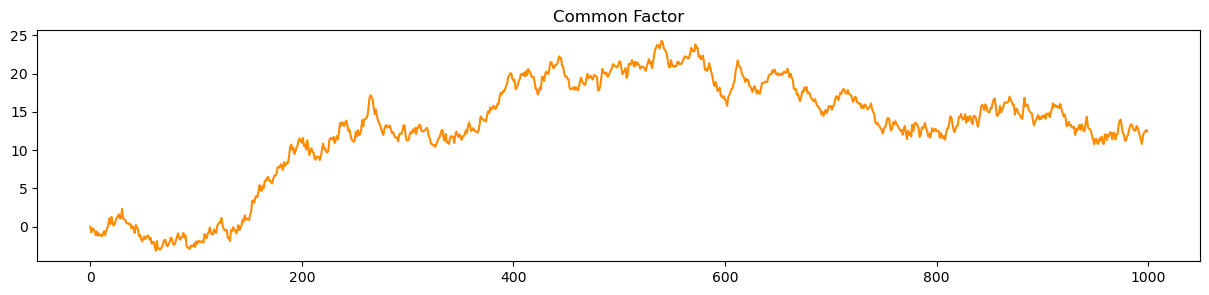

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [9]:
# 1

In [10]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.280318
95%        2.719339
99%        3.538375


beta =  [ 0.02871256 -0.03458323 -0.01795002  0.15043454  0.23385631  0.11164927
  0.10038764  0.19519659  0.00105685]
alpha =  -0.0759
ADF on residuals  stat = -10.716


Time series is Non Explosive. SADF Value is: 0.75

Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [11]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

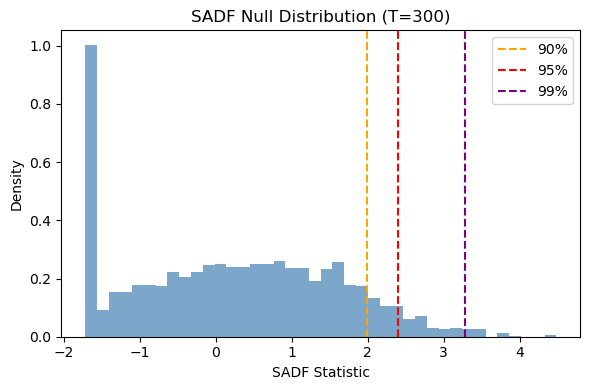

     Critical Value
90%        1.991676
95%        2.395641
99%        3.285502


beta =  [-0.00963493  0.01328685  0.06876738  0.15415888  0.10558528  0.14469159
  0.10599275  0.08048481  0.09375932]
alpha =  0.0695
ADF on residuals  stat = -12.927


Time series is Explosive. SADF Value is: 2.84

Bubble starts at t=179
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [12]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [13]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

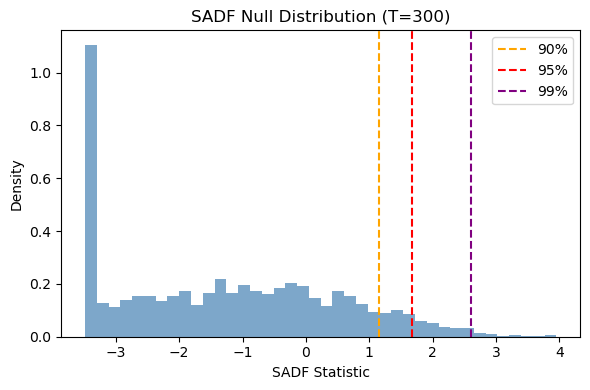

     Critical Value
90%        1.154493
95%        1.679526
99%        2.614245


beta =  [-0.0217756   0.07398001  0.14359036  0.11356339  0.12381951  0.12687003
  0.09132186  0.07220864  0.07588156]
alpha =  0.0859
ADF on residuals  stat = -15.171


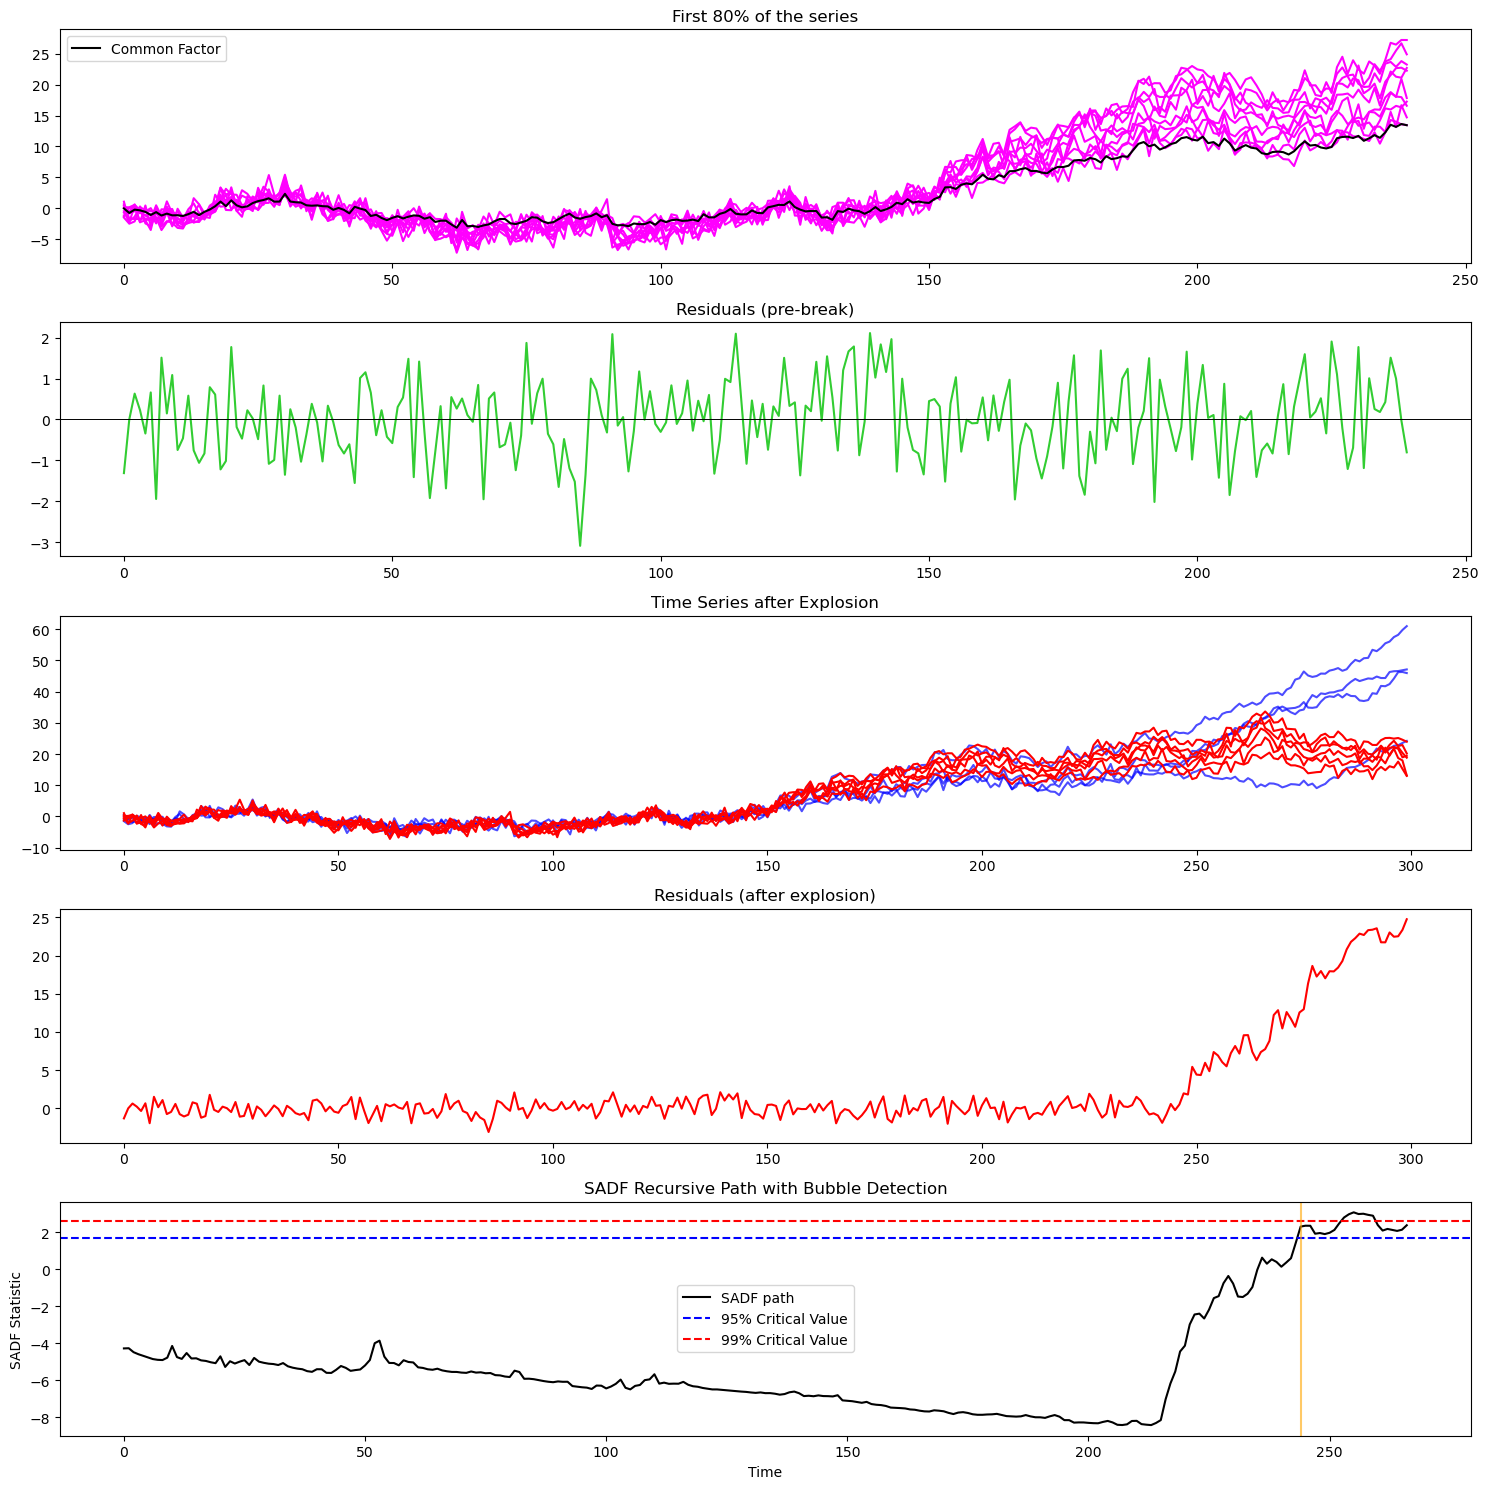

Time series is Explosive. SADF Value is: 3.07

Bubble starts at t=244
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [14]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.101470
95%        2.545201
99%        3.219513


beta =  [-0.03405225  0.03574196  0.1039552   0.15352258  0.08652692  0.12216237
  0.09291233  0.10583406  0.09052519]
alpha =  0.0859
ADF on residuals  stat = -14.143


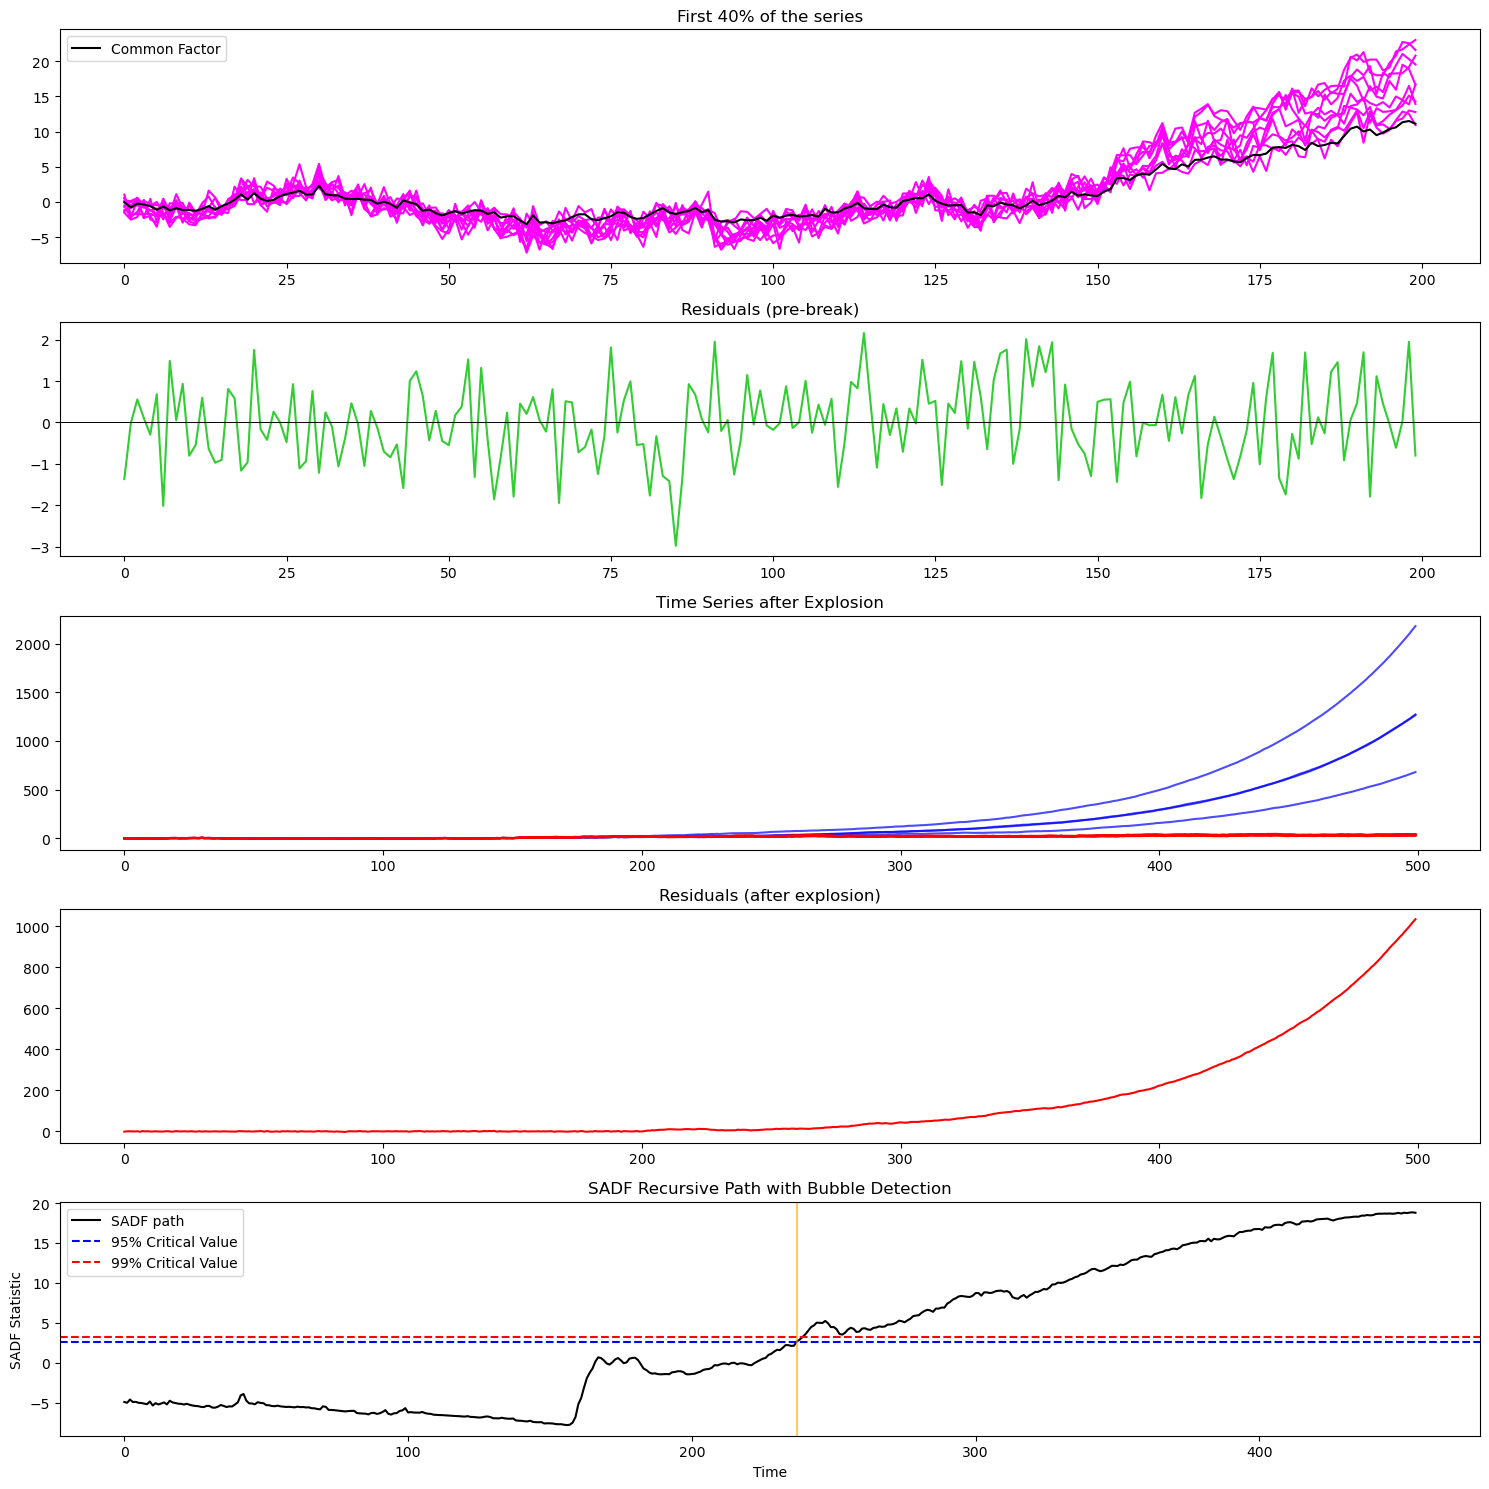

Time series is Explosive. SADF Value is: 18.84

Bubble starts at t=237
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [19]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [20]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

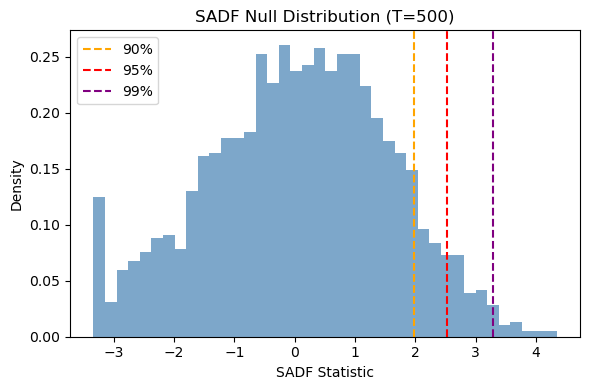

     Critical Value
90%        1.981519
95%        2.516982
99%        3.291376


beta =  [-0.00029865  0.06173165  0.10235389  0.07827834  0.11514405  0.13422432
  0.10181133  0.08637486  0.13922217]
alpha =  0.091
ADF on residuals  stat = -16.889


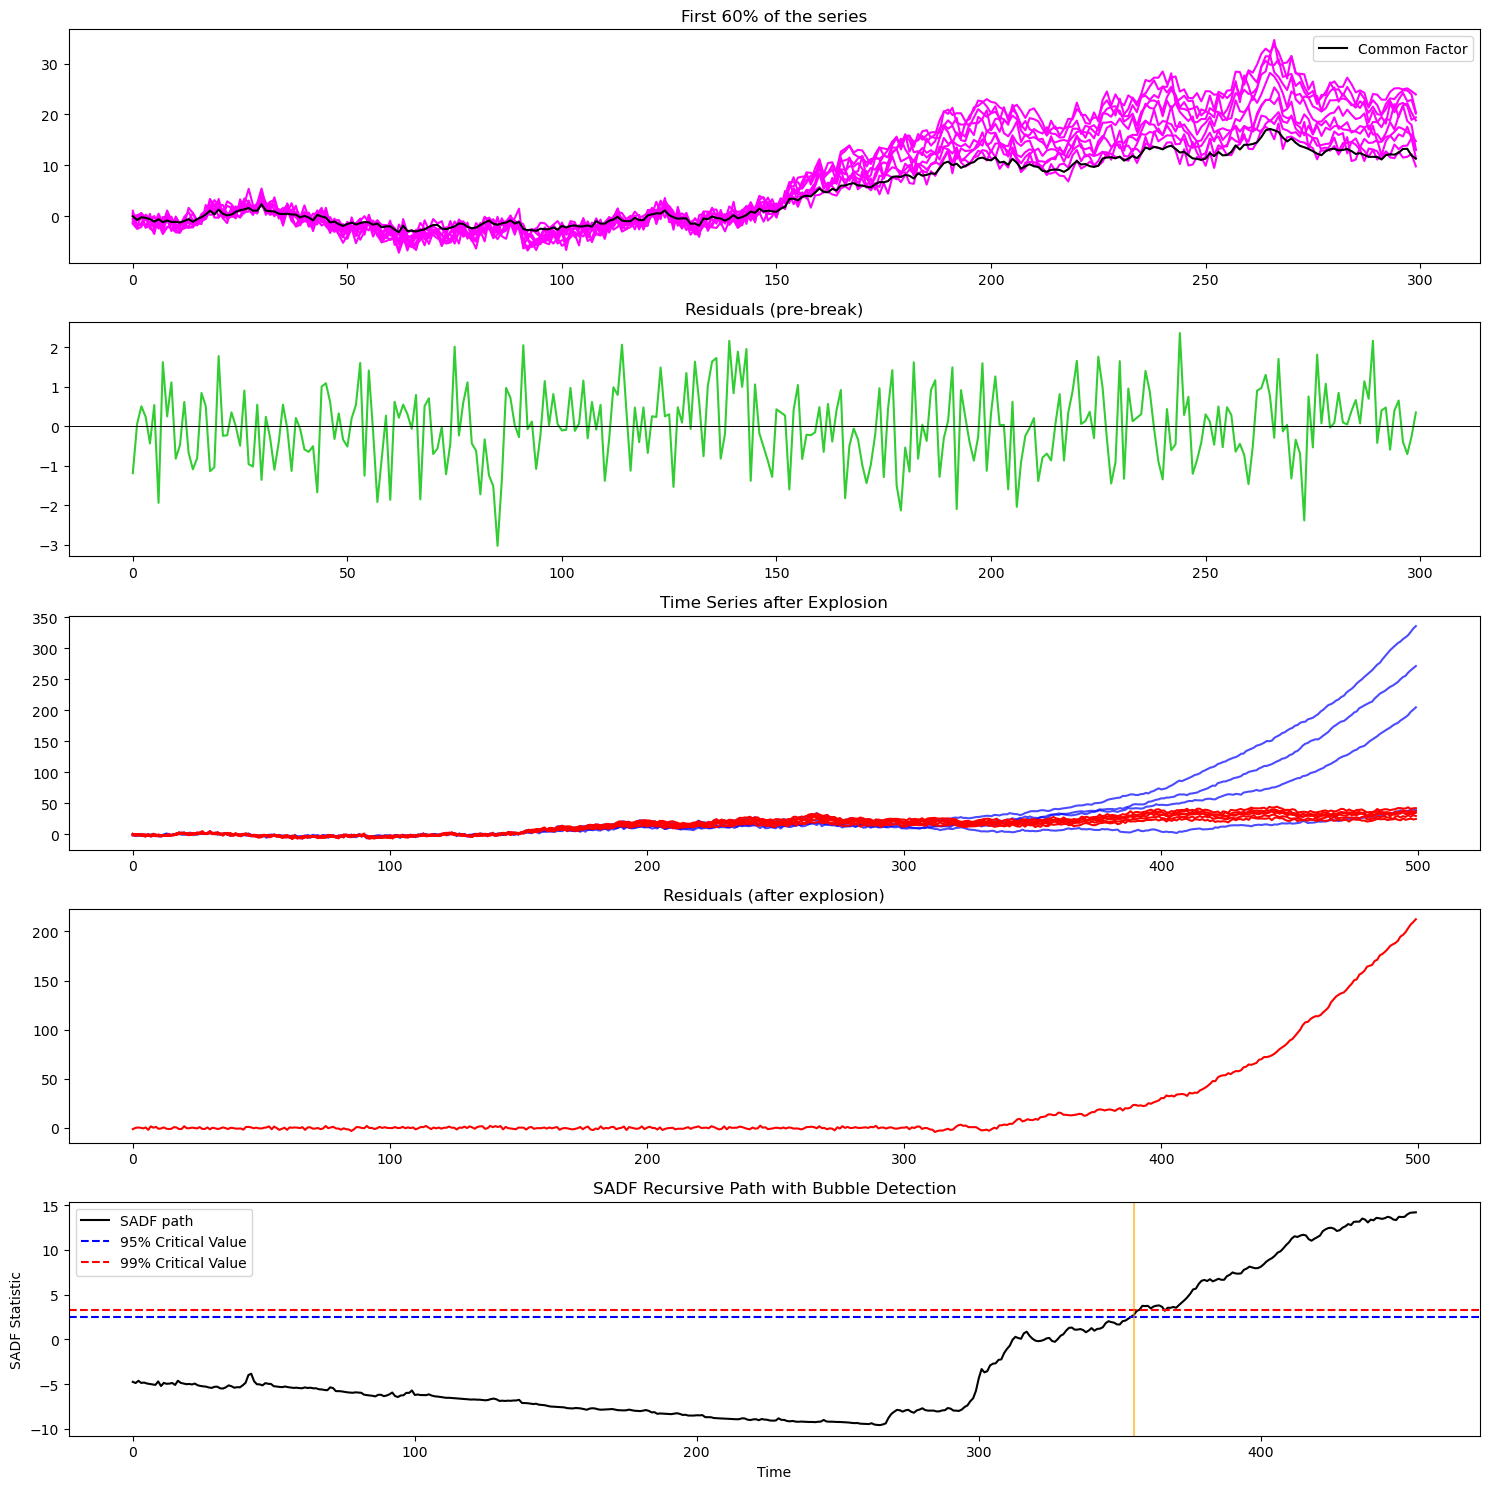

Time series is Explosive. SADF Value is: 14.2

Bubble starts at t=355
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [21]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [22]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

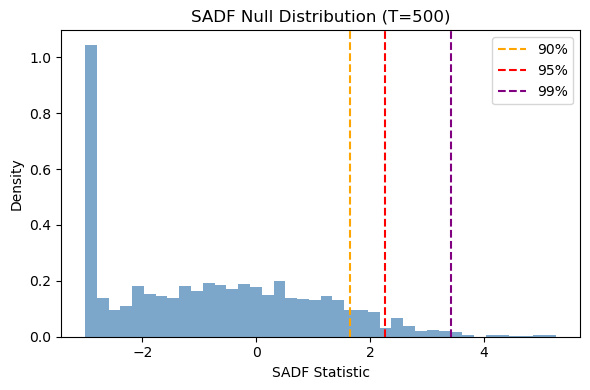

     Critical Value
90%        1.651883
95%        2.260506
99%        3.425342


beta =  [0.00878176 0.072979   0.09960222 0.06694615 0.09847321 0.12269829
 0.09975721 0.09170986 0.1648955 ]
alpha =  0.0773
ADF on residuals  stat = -19.336


Time series is Explosive. SADF Value is: 6.15

Bubble starts at t=408
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [23]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [25]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [26]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [27]:
# 67

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.340452
95%        2.708743
99%        3.583272


beta =  [-0.01123561  0.08113178  0.10431189  0.07171009  0.10808526  0.114538
  0.07661101  0.12198558  0.14544782]
alpha =  0.0938
ADF on residuals  stat = -17.555


In [ ]:
# 68

In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.073613
95%        2.607215
99%        3.305513


beta =  [-0.00370868  0.07849132  0.10451273  0.06083554  0.11568923  0.09161716
  0.11588118  0.08641028  0.16807368]
alpha =  0.112
ADF on residuals  stat = -21.388


Time series is Explosive. SADF Value is: 25.84

Bubble starts at t=491
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [31]:
# 69

In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        1.573236
95%        2.162481
99%        3.306035


beta =  [0.03782703 0.11219241 0.13903543 0.06779189 0.09354256 0.0817986
 0.07177203 0.07128392 0.15740091]
alpha =  0.0949
ADF on residuals  stat = -25.863


Time series is Explosive. SADF Value is: 14.12

Bubble starts at t=632
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

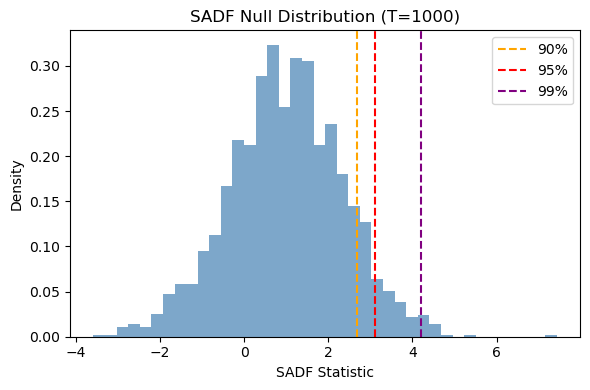

     Critical Value
90%        2.686081
95%        3.119893
99%        4.214863


beta =  [0.00878176 0.072979   0.09960222 0.06694615 0.09847321 0.12269829
 0.09975721 0.09170986 0.1648955 ]
alpha =  0.0773
ADF on residuals  stat = -19.336


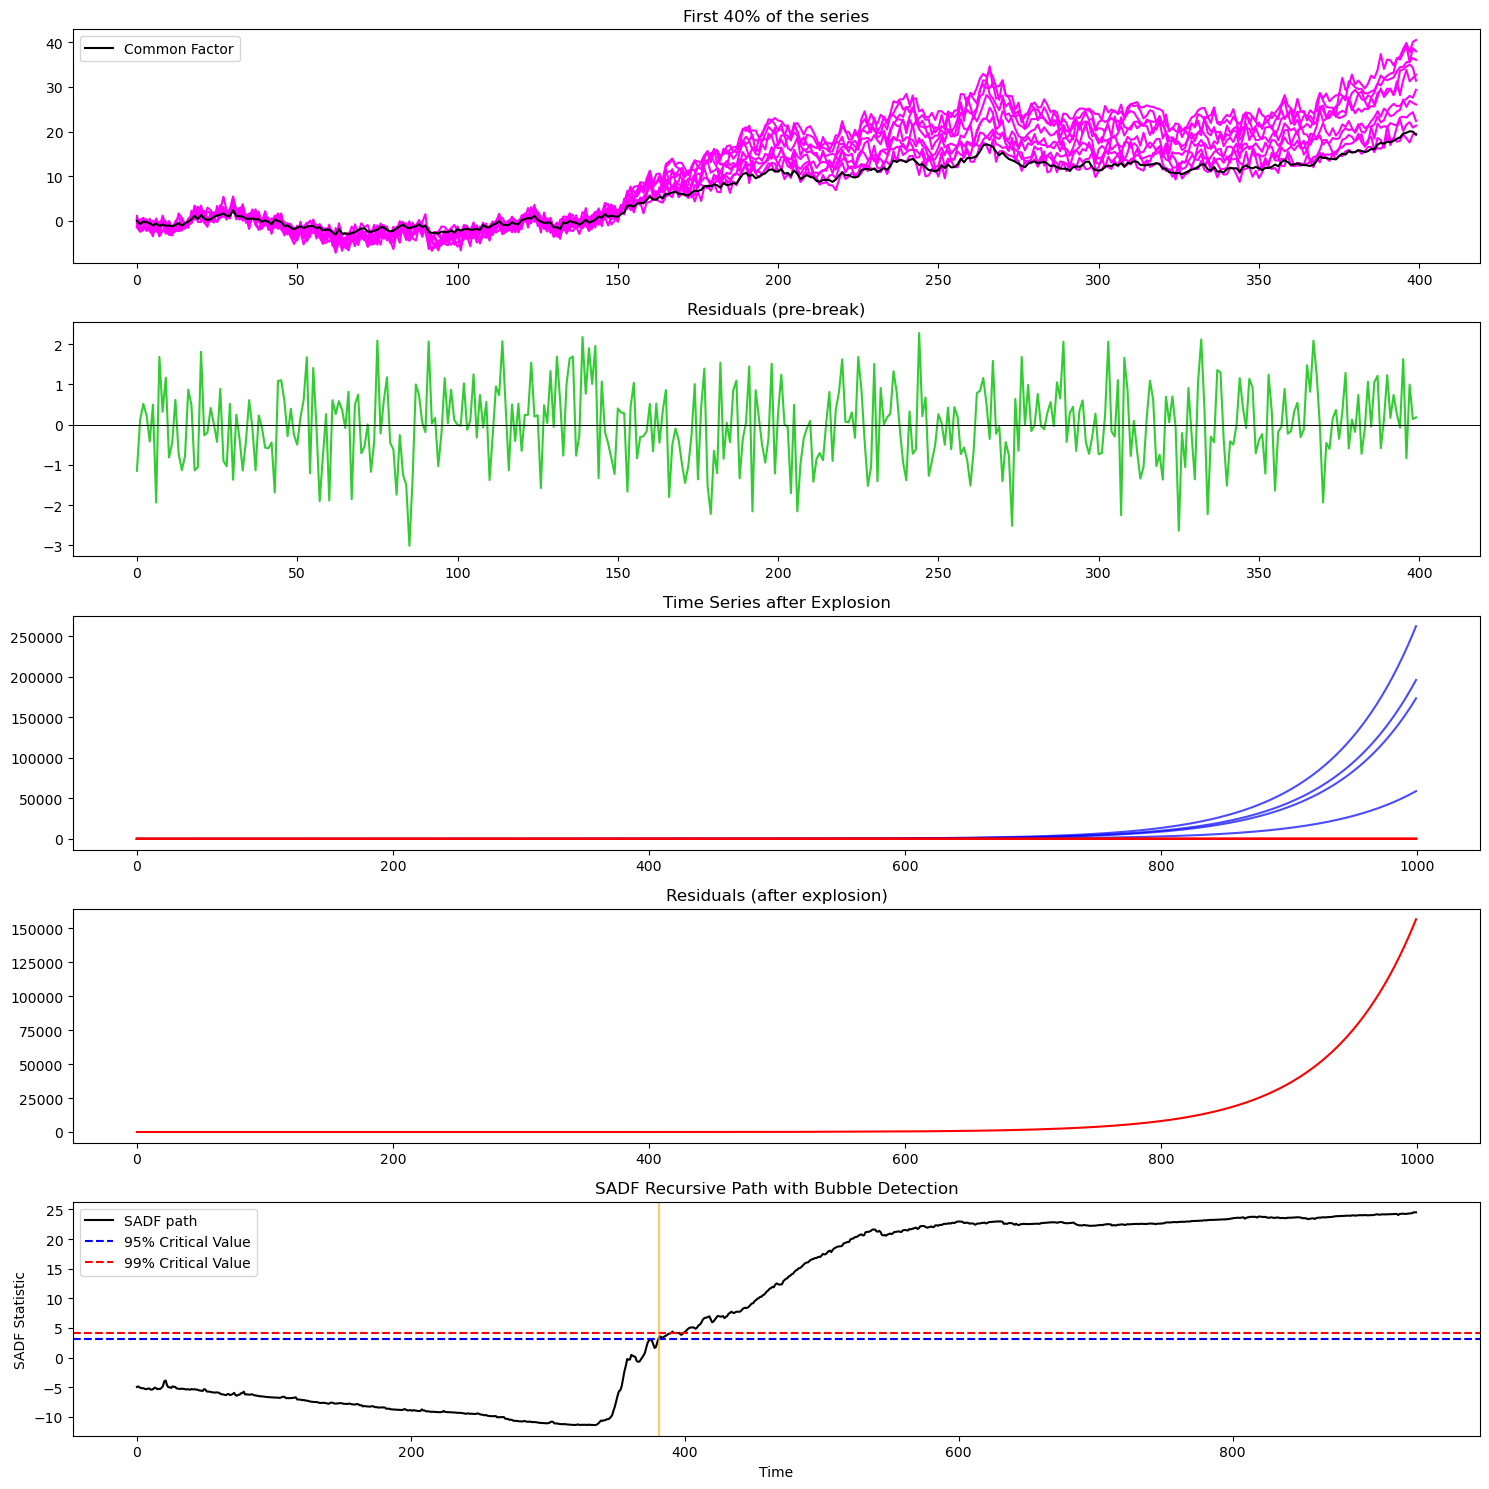

Time series is Explosive. SADF Value is: 24.51

Bubble starts at t=381
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [38]:
# 101

In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.011821
95%        2.487337
99%        3.386765


beta =  [0.03627306 0.10696668 0.12086318 0.06814484 0.08987767 0.08998513
 0.08421501 0.07327132 0.16433145]
alpha =  0.0973
ADF on residuals  stat = -24.941


Time series is Explosive. SADF Value is: 22.31

Bubble starts at t=814
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        1.272954
95%        1.953128
99%        3.009495


beta =  [0.07686326 0.06339378 0.11697954 0.06558896 0.0894769  0.08755844
 0.08496759 0.09475192 0.15354605]
alpha =  0.1098
ADF on residuals  stat = -28.813


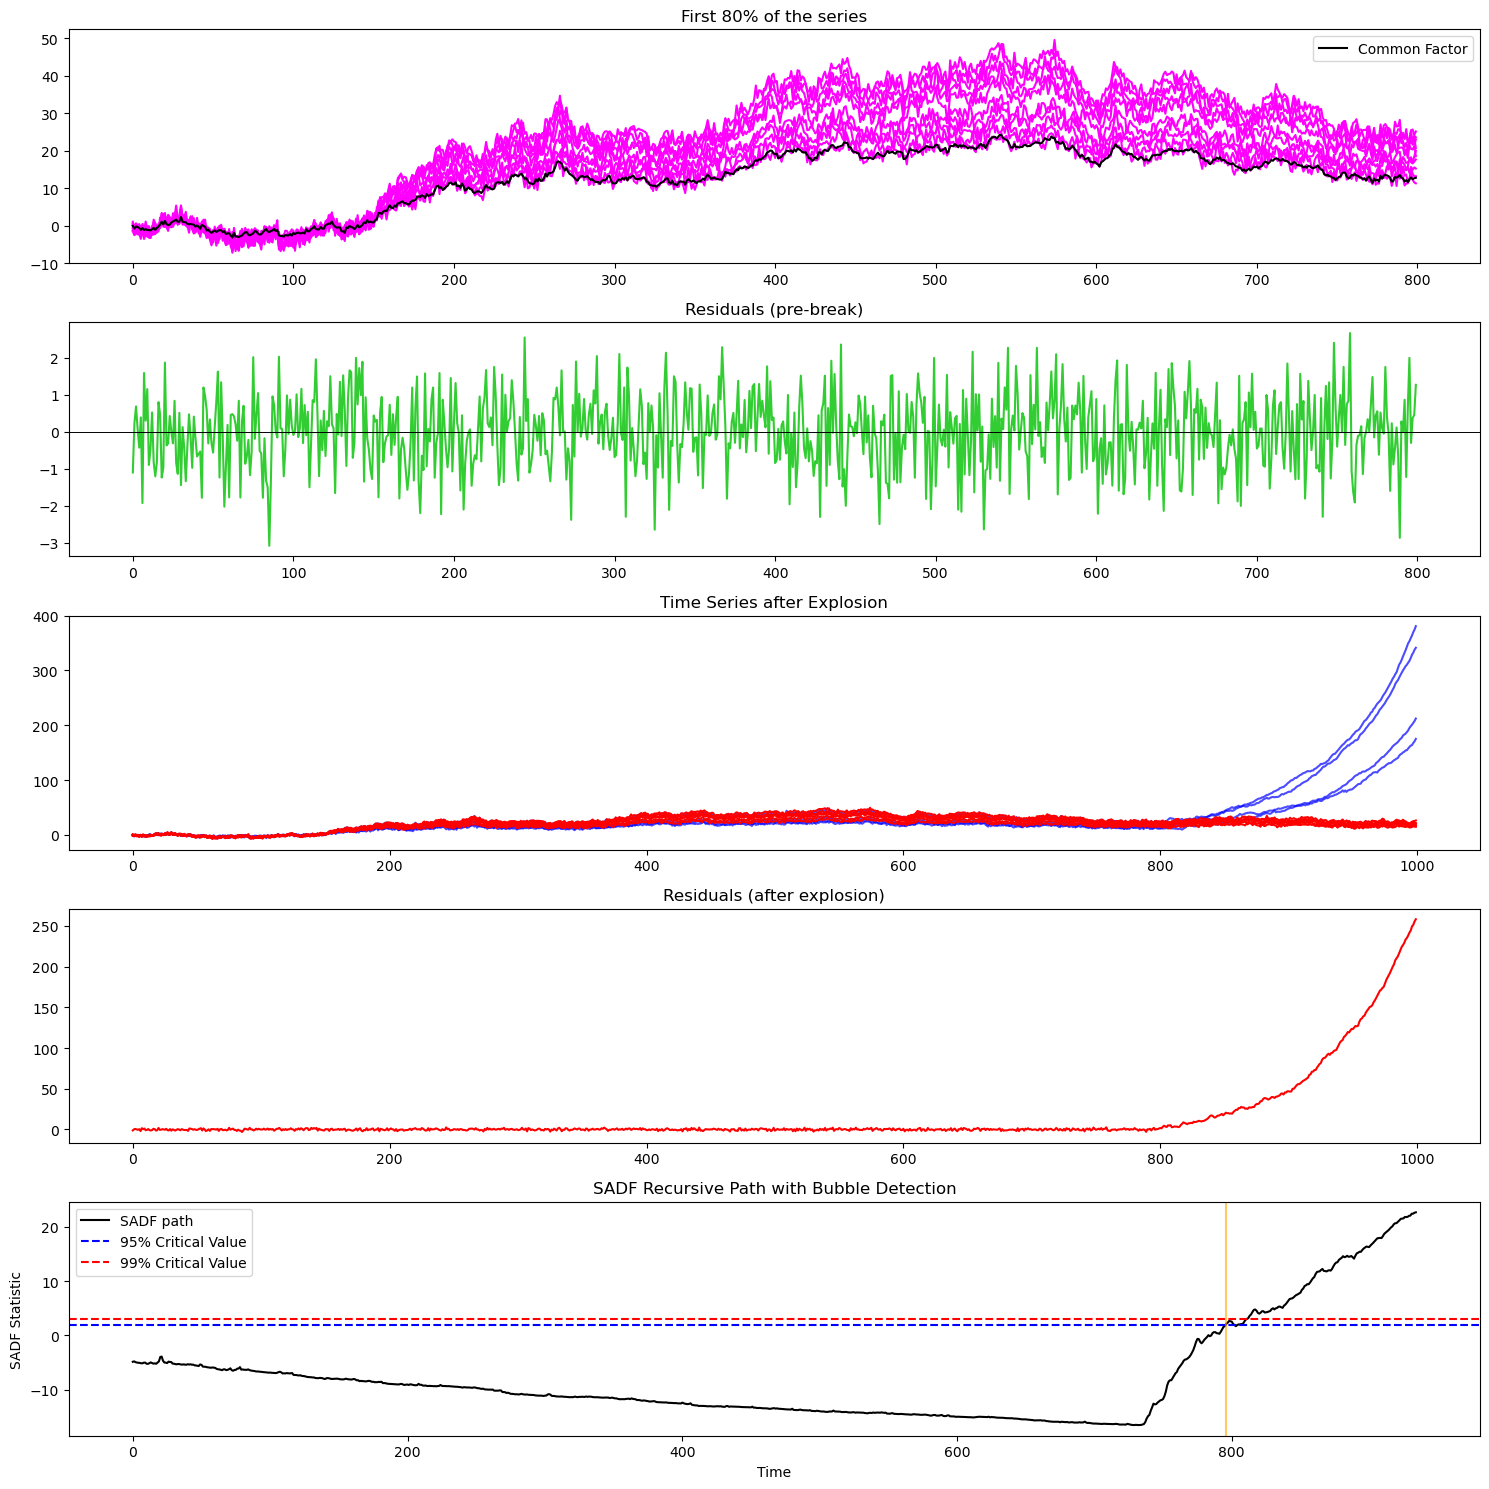

Time series is Explosive. SADF Value is: 22.7

Bubble starts at t=796
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

### Number of Bubble Series 60%

In [43]:
num_of_rw = 0.6

## N = 300

In [45]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [46]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

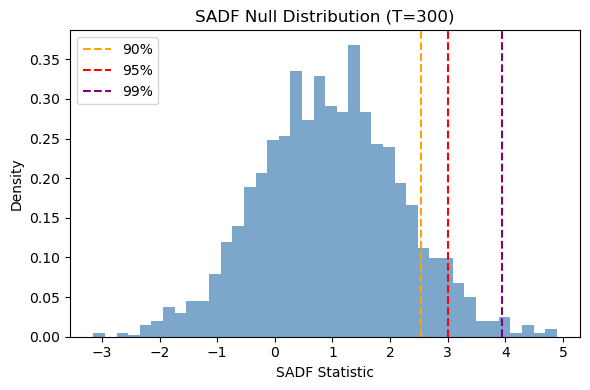

     Critical Value
90%        2.535146
95%        3.007216
99%        3.937042


beta =  [ 0.02871256 -0.03458323 -0.01795002  0.15043454  0.23385631  0.11164927
  0.10038764  0.19519659  0.00105685]
alpha =  -0.0759
ADF on residuals  stat = -10.716


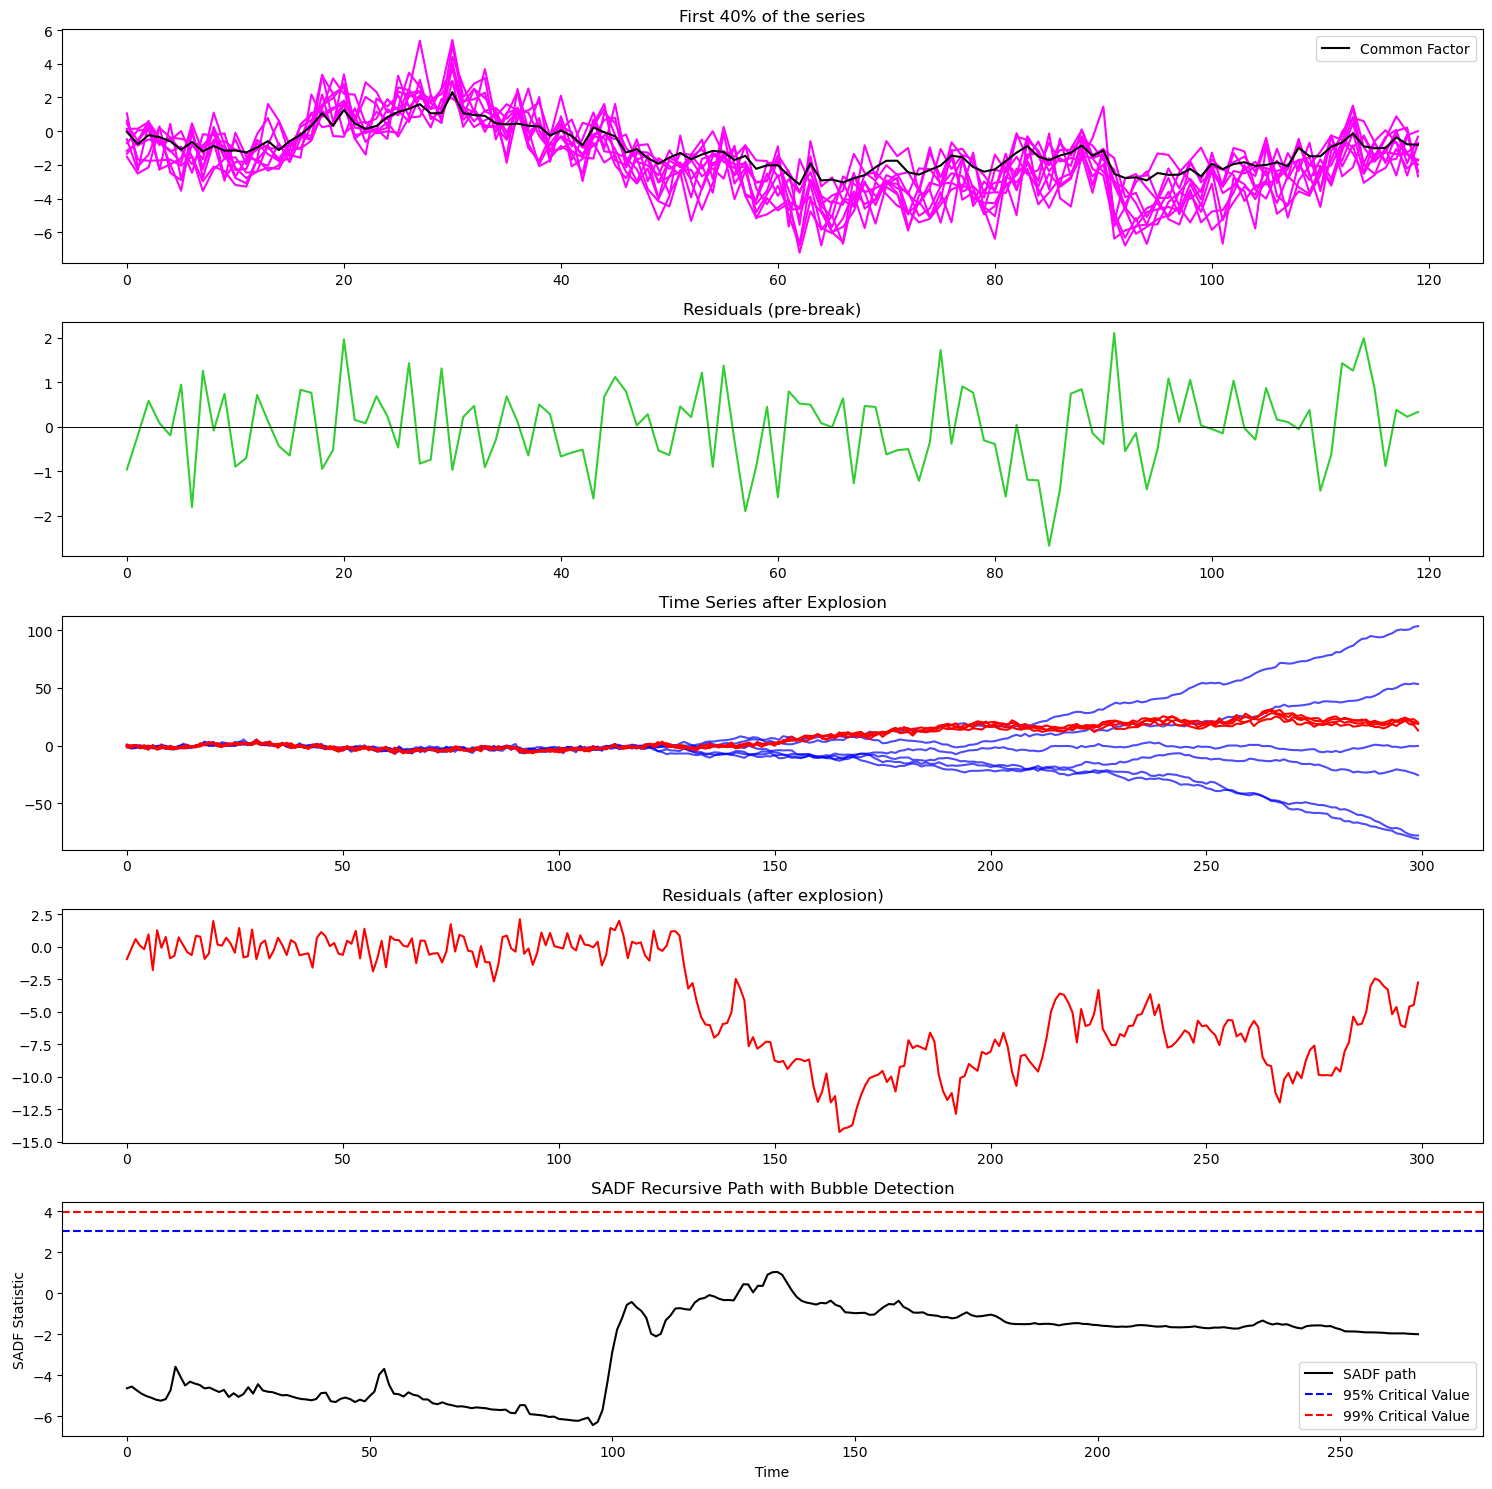

Time series is Non Explosive. SADF Value is: 1.03

Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [47]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

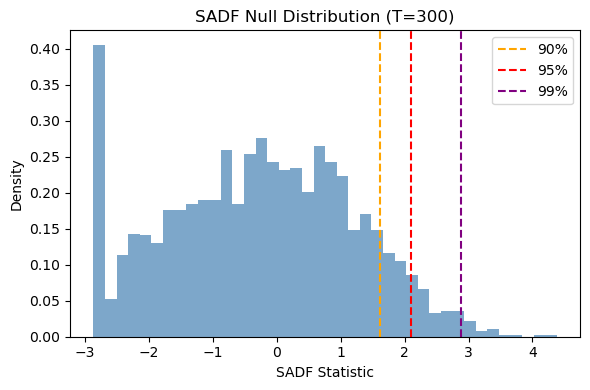

     Critical Value
90%        1.620027
95%        2.098952
99%        2.890076


beta =  [-0.00963493  0.01328685  0.06876738  0.15415888  0.10558528  0.14469159
  0.10599275  0.08048481  0.09375932]
alpha =  0.0695
ADF on residuals  stat = -12.927


In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [ ]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [ ]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [ ]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [ ]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

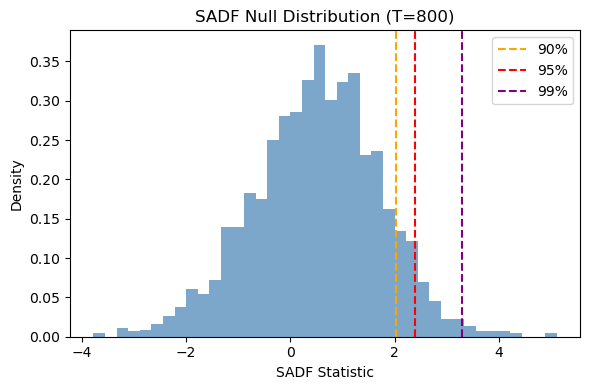

     Critical Value
90%        2.021042
95%        2.394940
99%        3.301225


beta =  [-0.01123561  0.08113178  0.10431189  0.07171009  0.10808526  0.114538
  0.07661101  0.12198558  0.14544782]
alpha =  0.0938
ADF on residuals  stat = -17.555


Time series is Explosive. SADF Value is: 23.42

Bubble starts at t=299
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [59]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

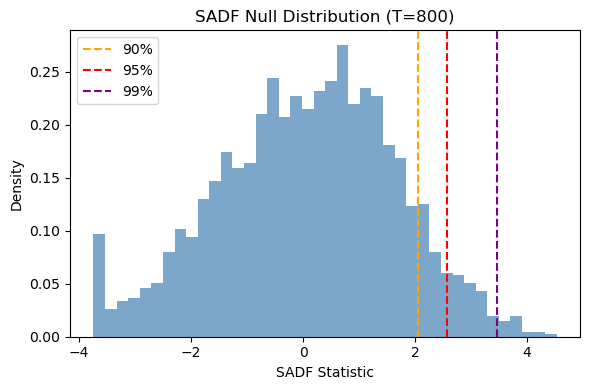

     Critical Value
90%        2.048119
95%        2.568643
99%        3.454654


beta =  [-0.00370868  0.07849132  0.10451273  0.06083554  0.11568923  0.09161716
  0.11588118  0.08641028  0.16807368]
alpha =  0.112
ADF on residuals  stat = -21.388


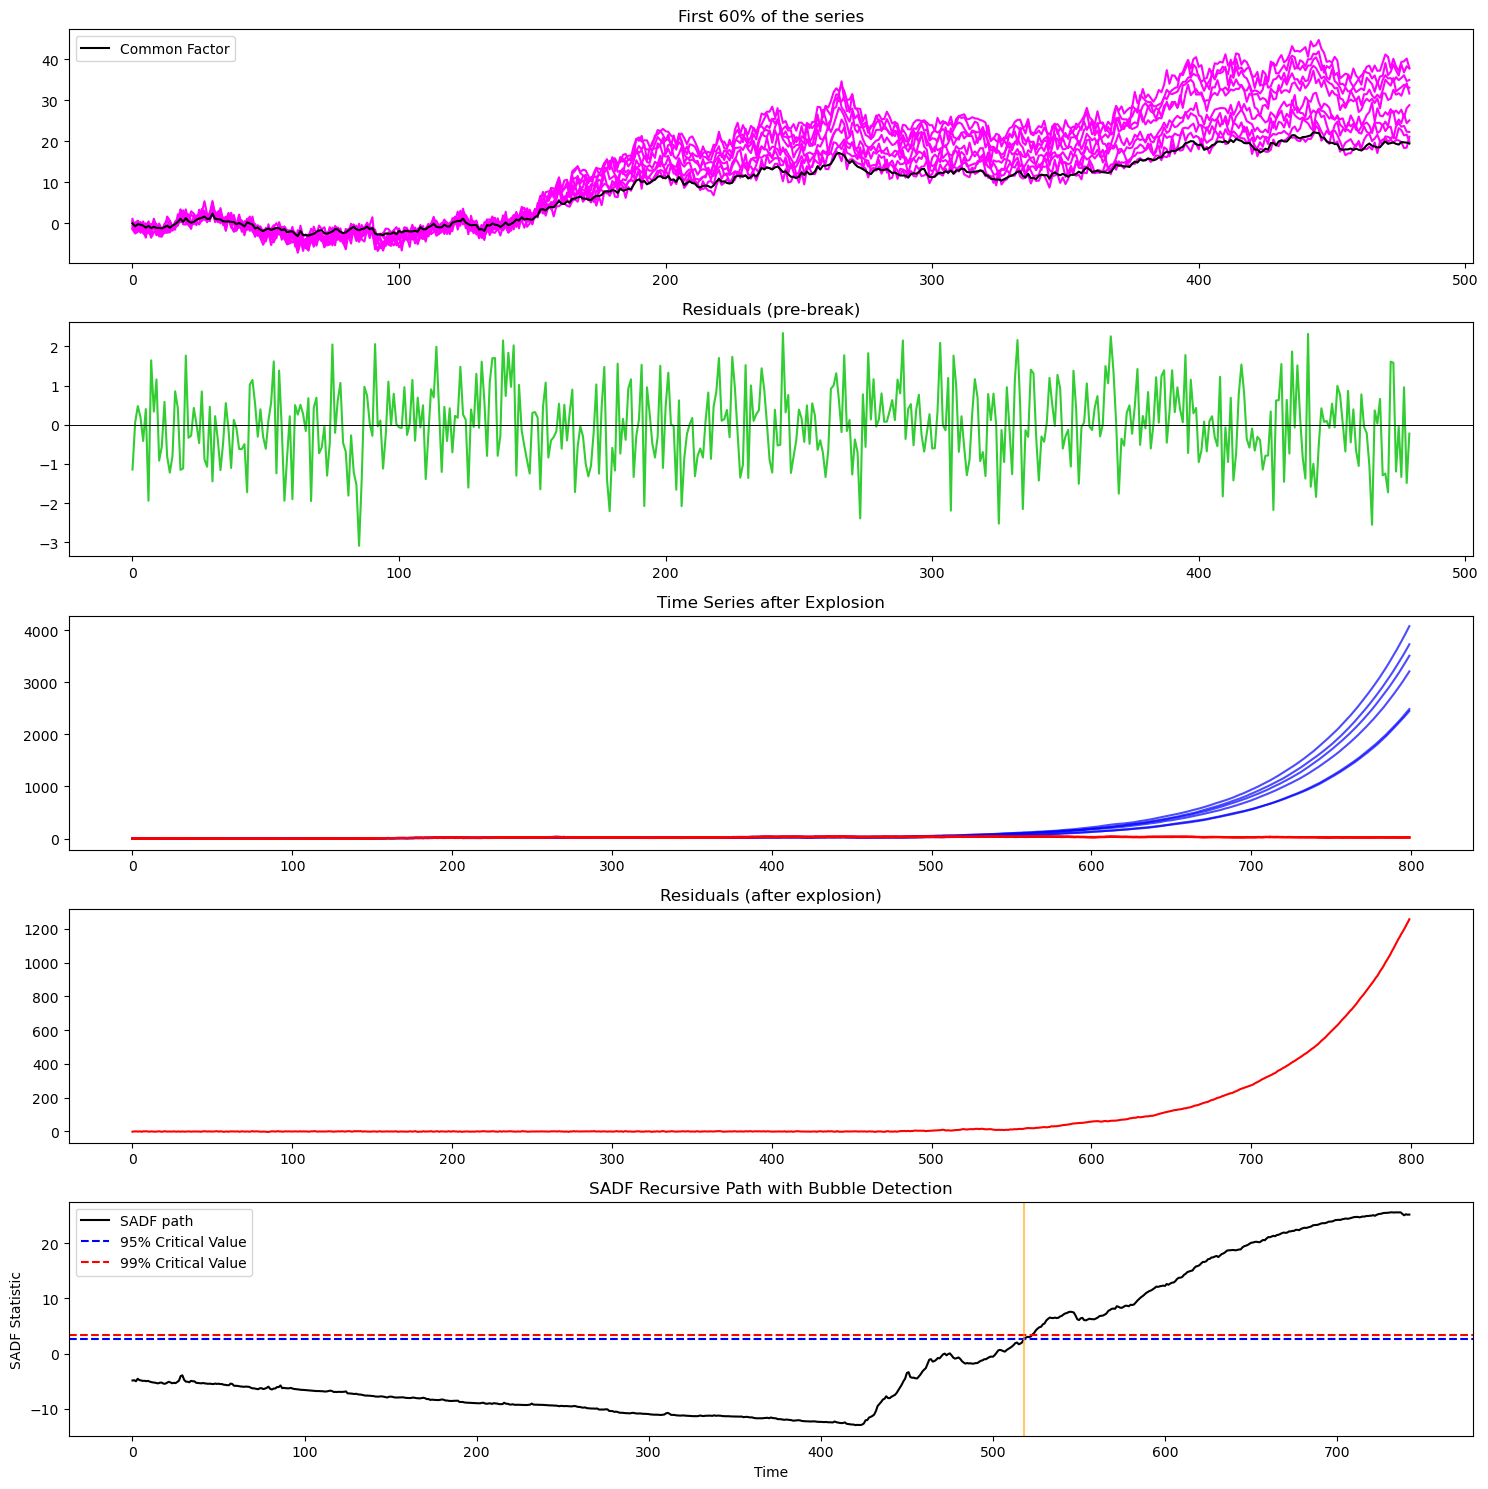

Time series is Explosive. SADF Value is: 25.55

Bubble starts at t=518
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [60]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

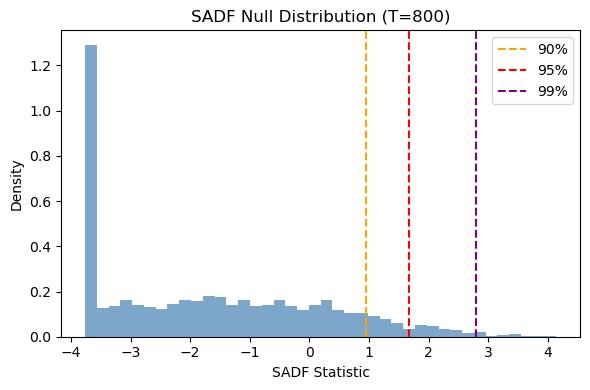

     Critical Value
90%        0.953253
95%        1.661593
99%        2.786393


beta =  [0.03782703 0.11219241 0.13903543 0.06779189 0.09354256 0.0817986
 0.07177203 0.07128392 0.15740091]
alpha =  0.0949
ADF on residuals  stat = -25.863


Time series is Explosive. SADF Value is: 14.43

Bubble starts at t=661
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [61]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [63]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [64]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        2.126255
95%        2.625702
99%        3.525697


beta =  [0.00878176 0.072979   0.09960222 0.06694615 0.09847321 0.12269829
 0.09975721 0.09170986 0.1648955 ]
alpha =  0.0773
ADF on residuals  stat = -19.336


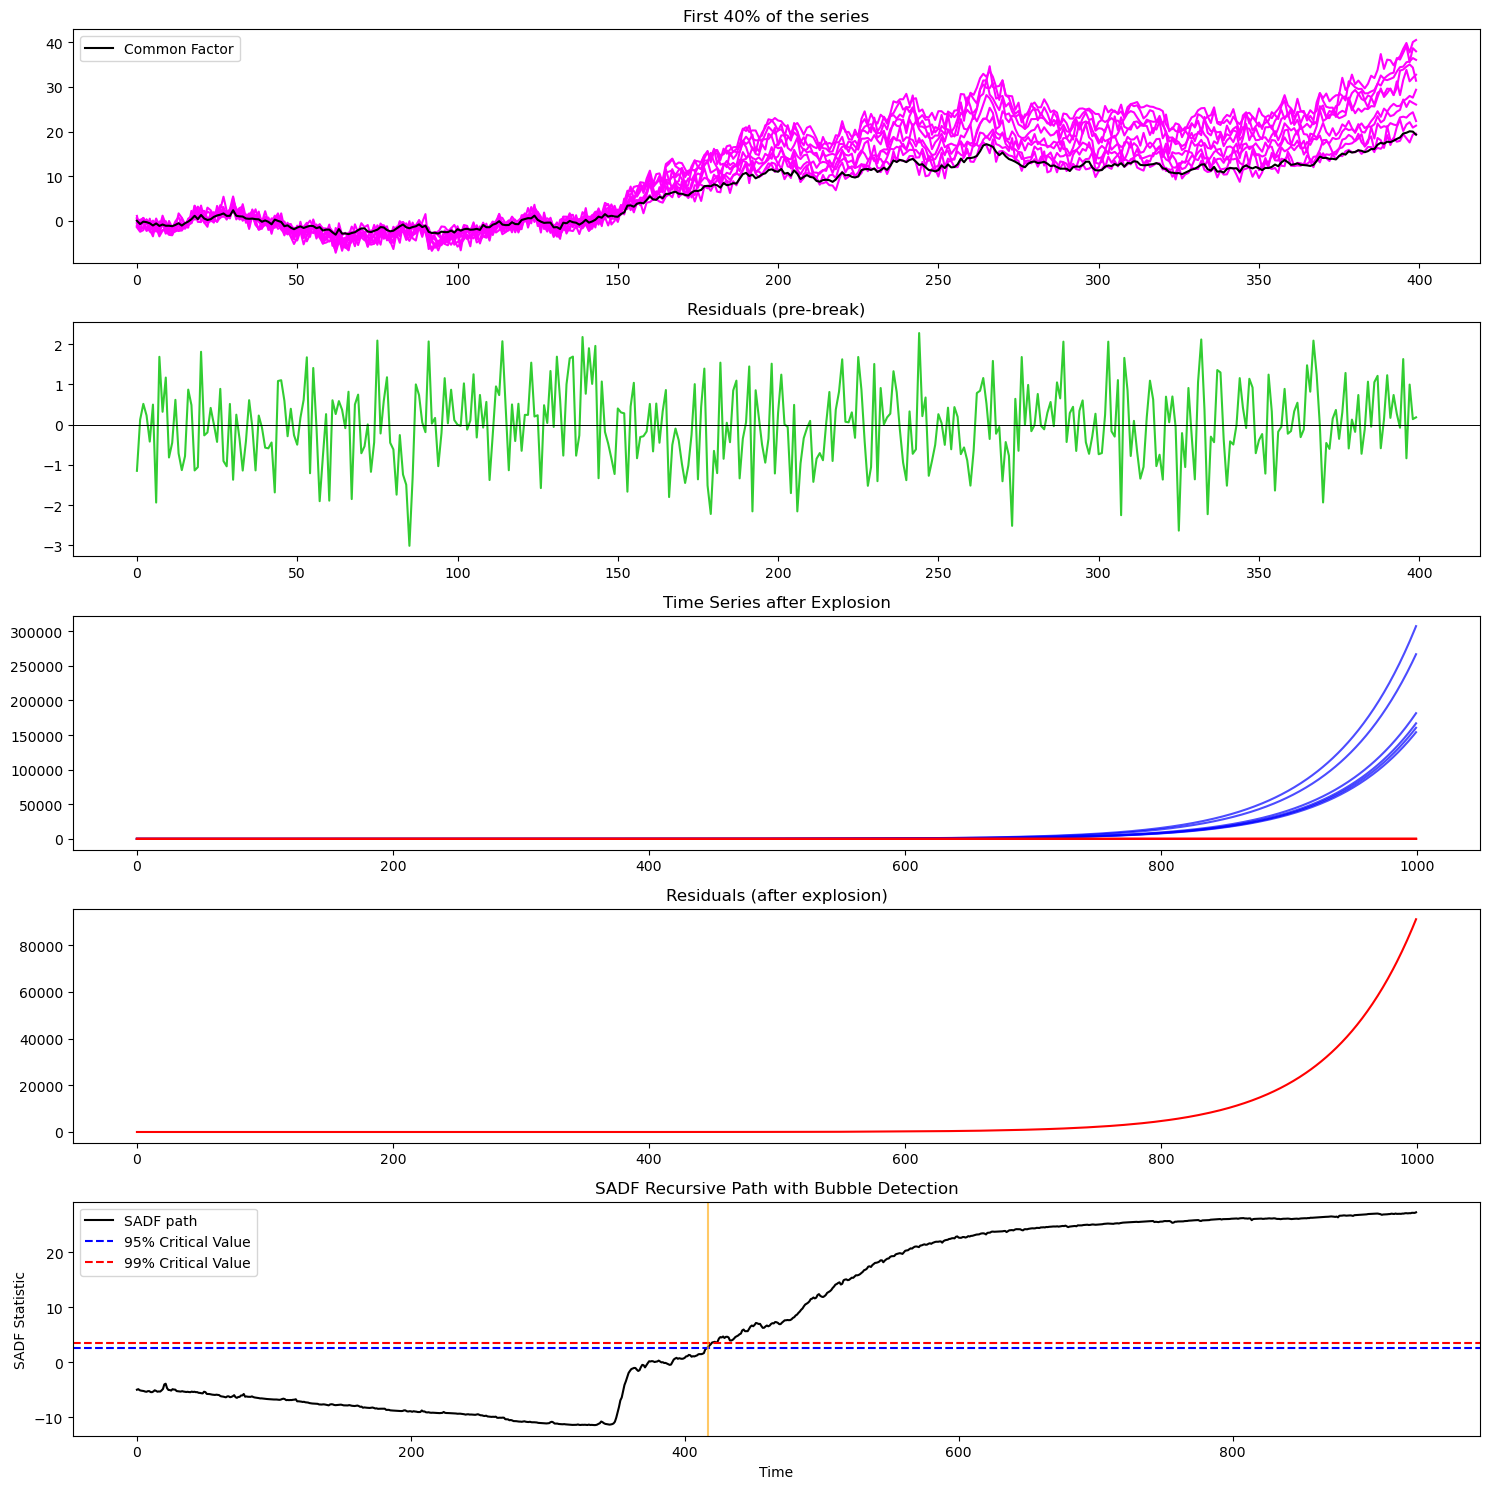

Time series is Explosive. SADF Value is: 27.27

Bubble starts at t=417
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [65]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

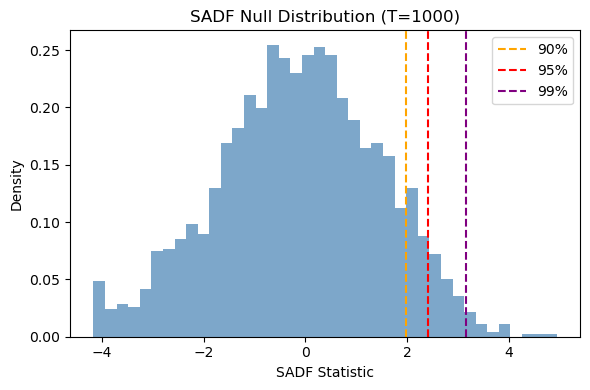

     Critical Value
90%        1.970069
95%        2.414057
99%        3.168411


beta =  [0.03627306 0.10696668 0.12086318 0.06814484 0.08987767 0.08998513
 0.08421501 0.07327132 0.16433145]
alpha =  0.0973
ADF on residuals  stat = -24.941


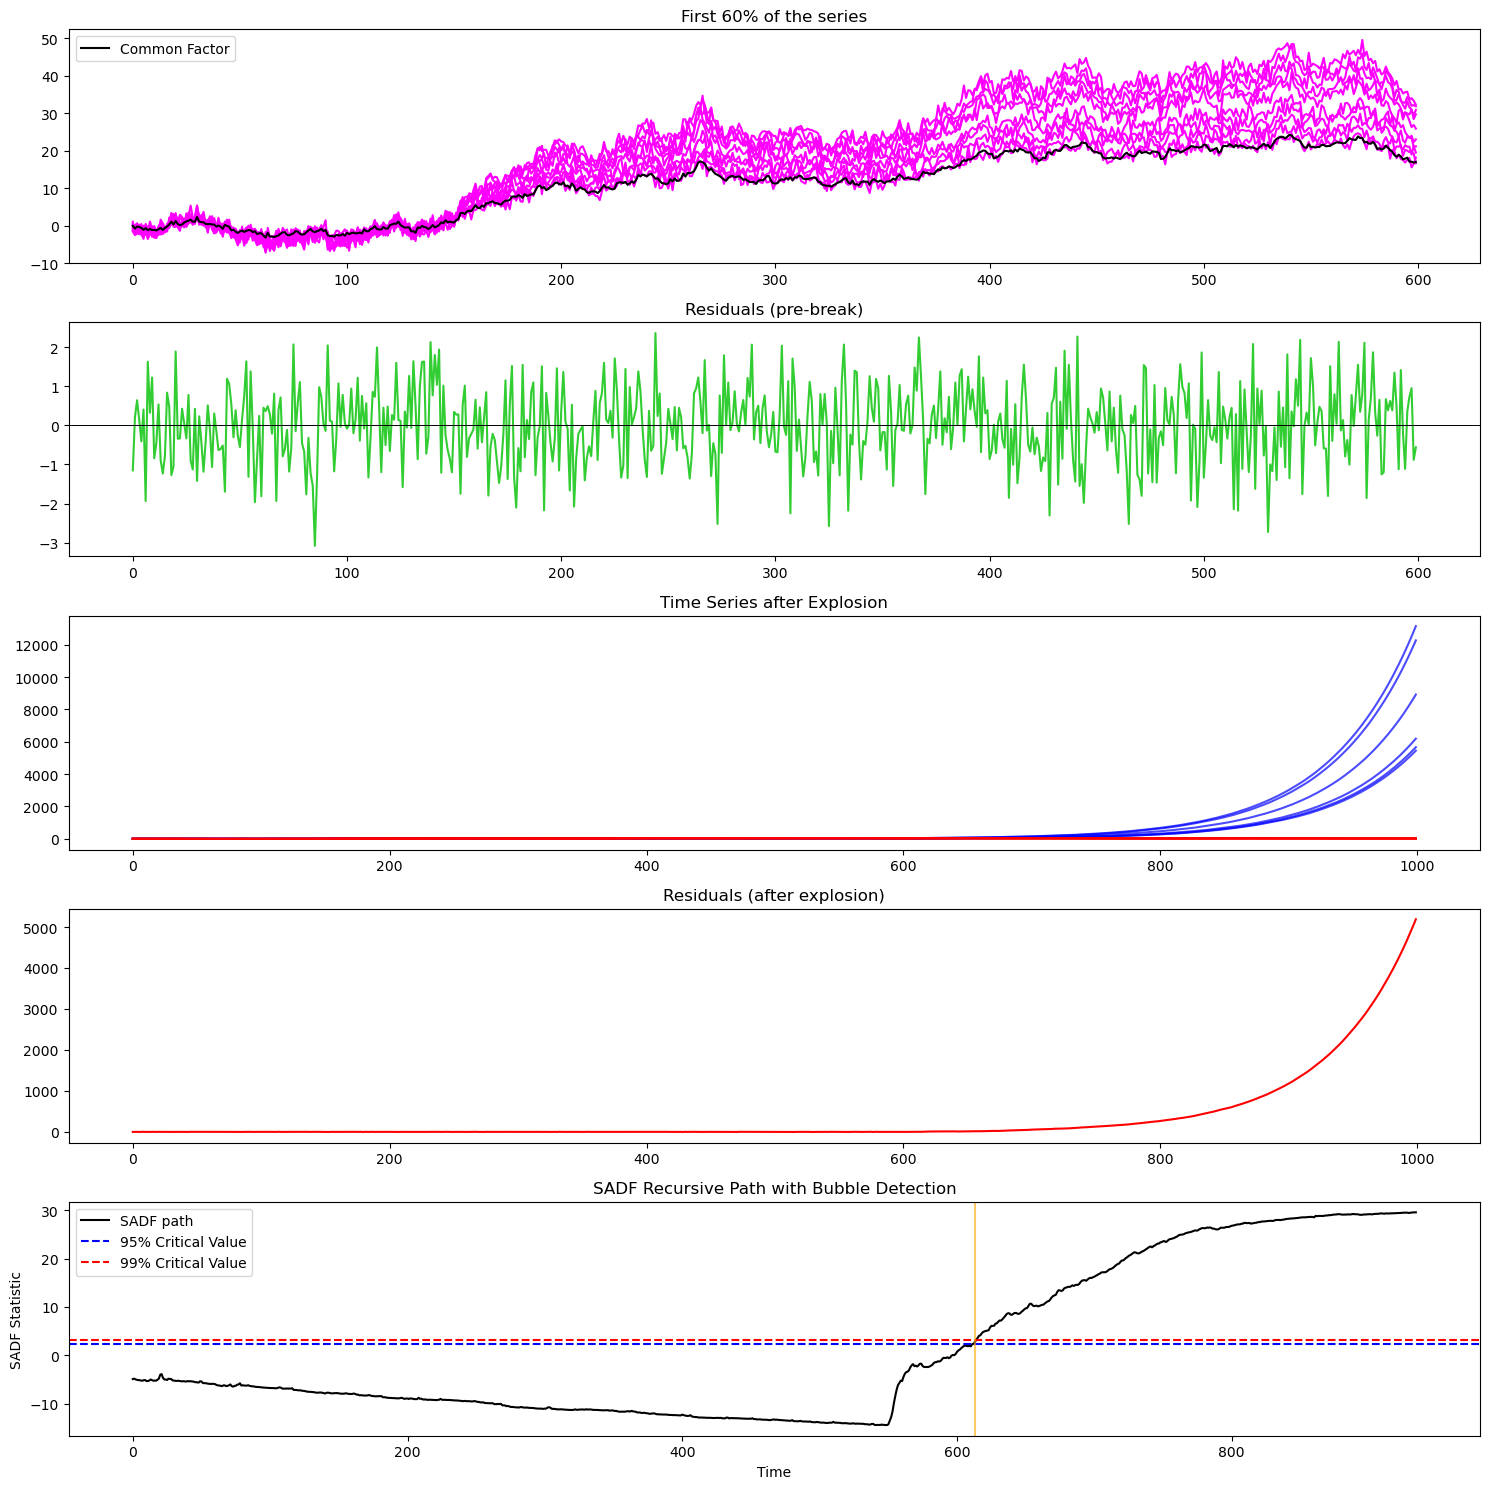

Time series is Explosive. SADF Value is: 29.55

Bubble starts at t=613
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [66]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

     Critical Value
90%        1.567962
95%        2.253617
99%        3.418053


beta =  [0.07686326 0.06339378 0.11697954 0.06558896 0.0894769  0.08755844
 0.08496759 0.09475192 0.15354605]
alpha =  0.1098
ADF on residuals  stat = -28.813


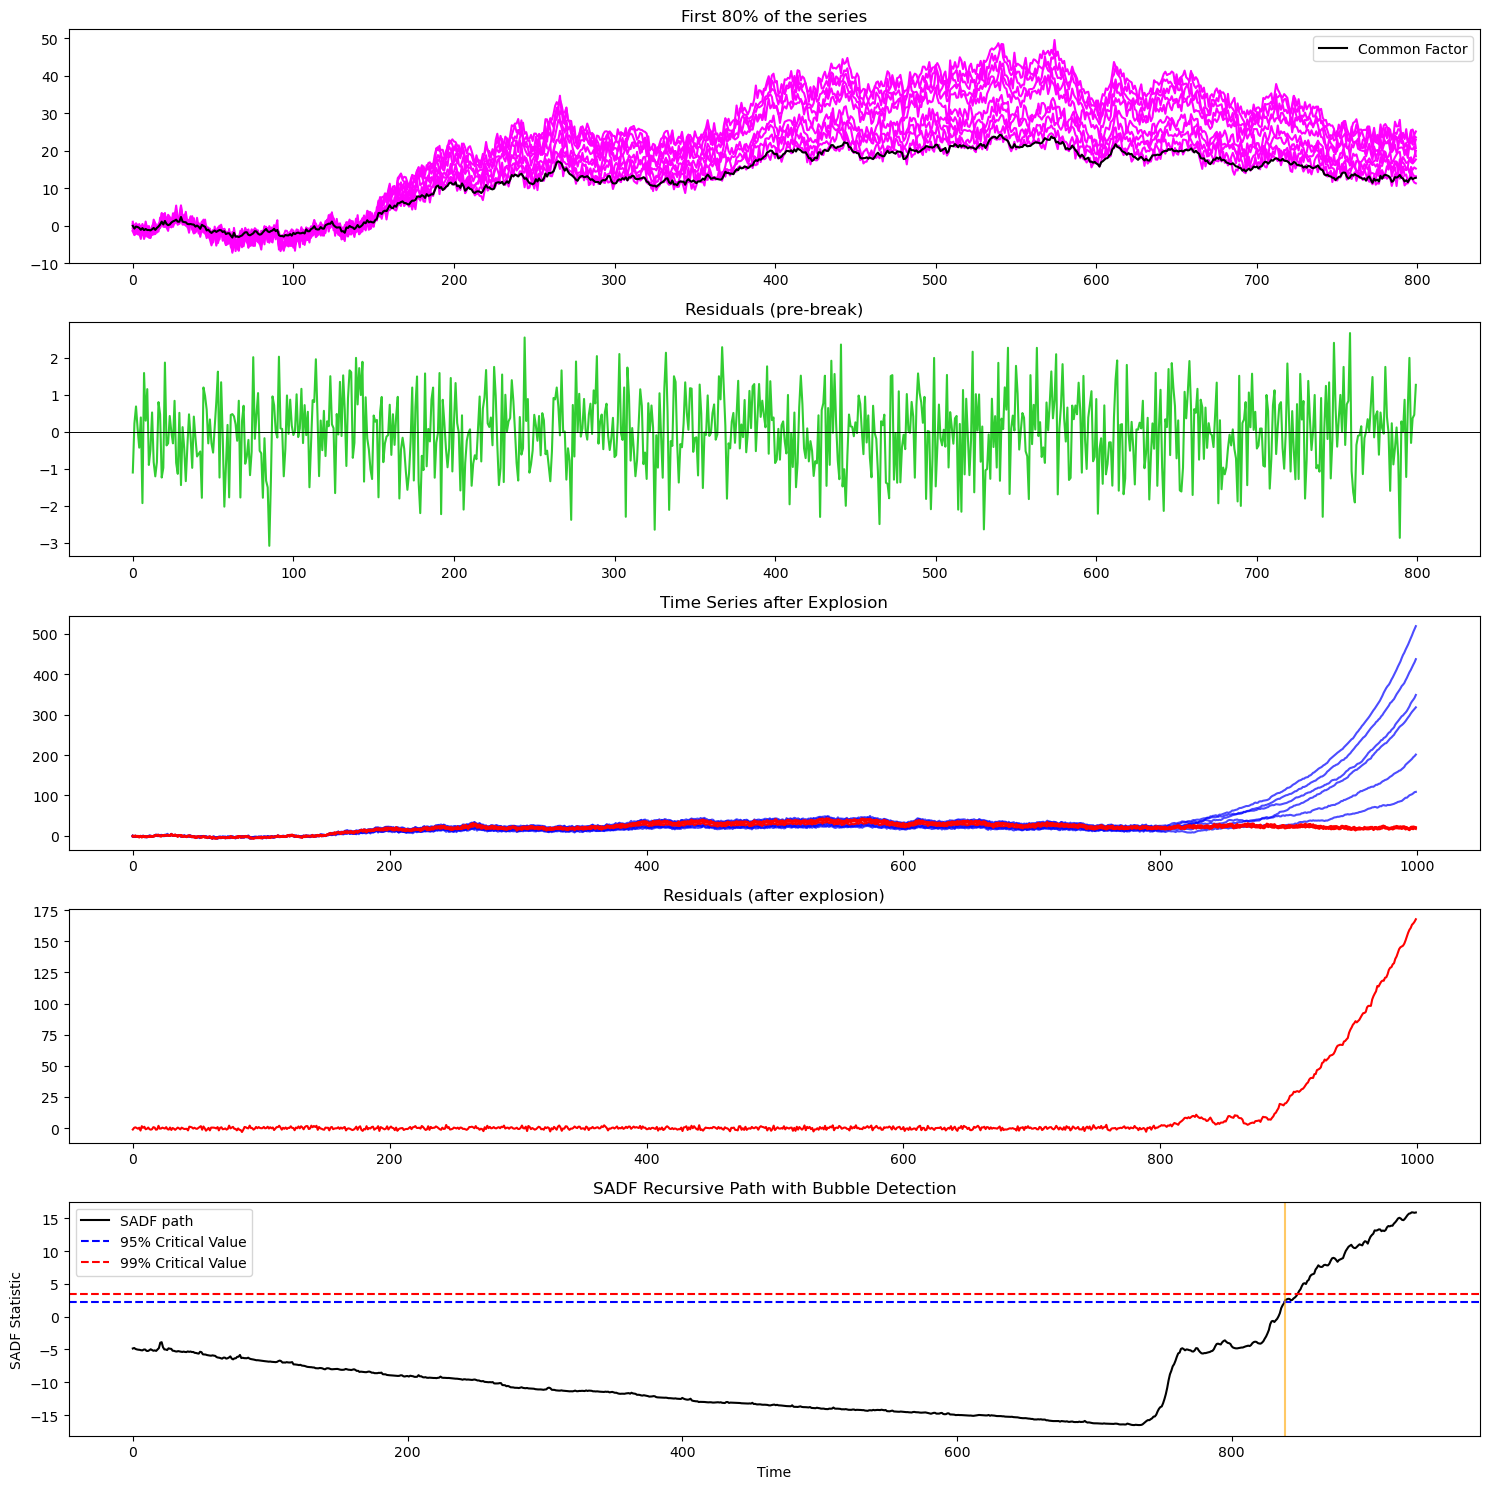

Time series is Explosive. SADF Value is: 15.9

Bubble starts at t=839
Multipliers: [1.3 1.  1.1 1.9 2.  1.2 1.4 1.6 1.8 1.7]


In [67]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [68]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment.csv", index=False)

In [69]:
import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)